<a href="https://colab.research.google.com/github/jdmartinev/ST1613-AppliedML-/blob/main/Semana05/Agrupamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupamiento (Clustering)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_blobs, make_circles, make_moons

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    PolynomialFeatures,
    FunctionTransformer,
)

In [3]:
# Definamos el "random_state" para que los resultados sean reproducibles:
random_state=42

In [4]:
# Cambiemos la fuente de las gráficas de matplotlib:
plt.rc('font', family='serif', size=12)

## Ejemplo Práctico

Para los datasets planteados realice el siguiente proceso de clustering:

- Halle y grafique los clusters resultantes de aplicar K-medias con $K = 2$.
- Encuentre un buen valor de K mediante el método del codo y grafique los nuevos clusters.
- Halle la inercia en cada caso.


### Dataset 1

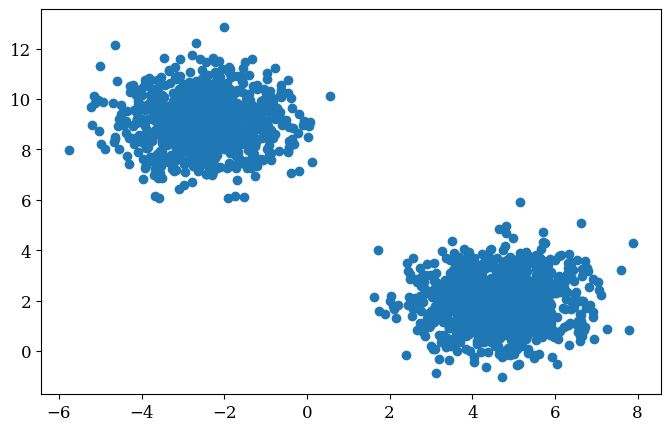

In [10]:
data, _ = make_blobs(n_samples=2000, n_features=2, centers=2, random_state=random_state)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
fig.set_size_inches(5*1.6, 5)

In [34]:
#Definir el pipeline de pre-procesamiento
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer,np.arange(data.shape[1])),
    ],
)

In [38]:
np.arange(data.shape[1])

array([0, 1])

In [39]:
#Definimos el Pipeline de clustering con K = 2
clu_kmeans = Pipeline(steps=[("preprocessor", preprocessor), ("clustering",KMeans(n_clusters=2))])

In [40]:
#Entrenamos
clu_kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array([0, 1]))])),
                ('clustering', KMeans(n_clusters=2))])

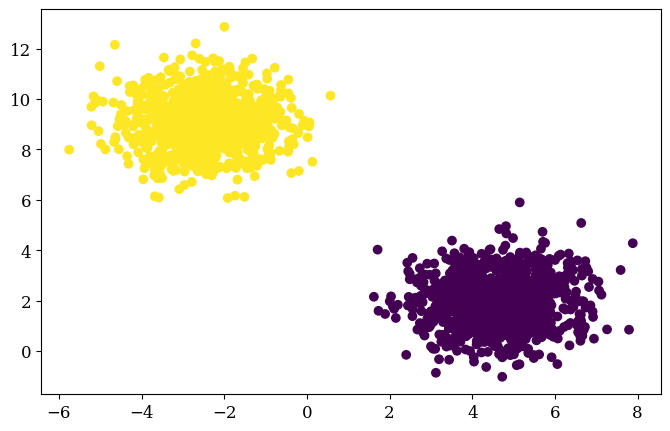

In [49]:
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], c=clu_kmeans['clustering'].labels_)
fig.set_size_inches(5*1.6, 5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

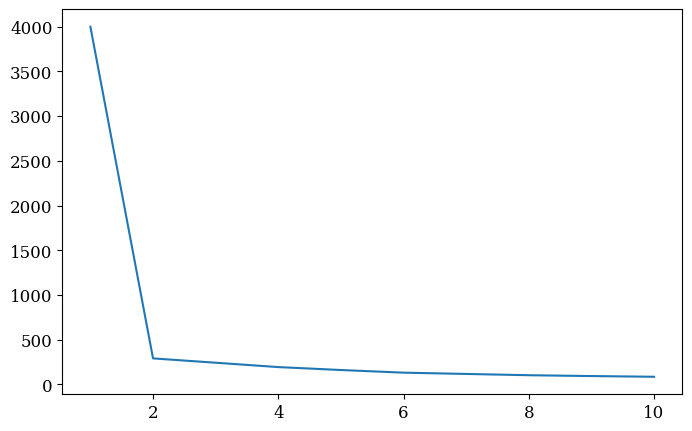

In [51]:
inert = []
k_range = list(range(1, 11))
for k in k_range:
    clu_kmeans = Pipeline(steps=[("preprocessor", preprocessor), ("clustering",KMeans(n_clusters=k))])
    clu_kmeans.fit(data)
    inert.append(clu_kmeans['clustering'].inertia_)
    
fig, ax = plt.subplots()   
ax.plot(k_range, inert)
fig.set_size_inches(5*1.6, 5)

Daado que el "codo" está en $K = 2$, no aplicaremos K-medias de nuevo.

### Dataset 2

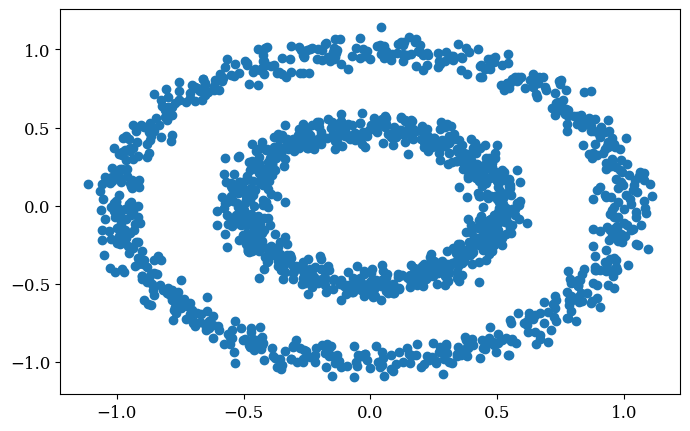

In [56]:
data, _ = make_circles(
    n_samples=1500,
    factor=.5,
    noise=.05,
    random_state=random_state
)

fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1])
fig.set_size_inches(5*1.6, 5)

In [57]:
#Definimos el Pipeline de clustering con K = 2
clu_kmeans = Pipeline(steps=[("preprocessor", preprocessor), ("clustering",KMeans(n_clusters=2))])
clu_kmeans.fit(data)
print(f'con K = 2: la inercia es {clu_kmeans["clustering"].inertia_}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


con K = 2: la inercia es 1901.8265619817453


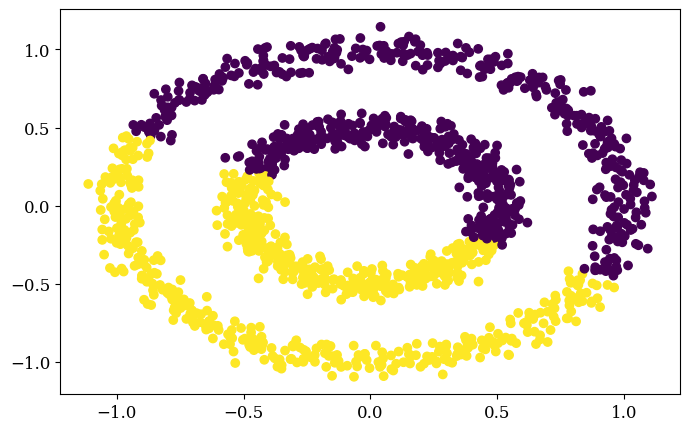

In [58]:
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], c=clu_kmeans["clustering"].labels_)
fig.set_size_inches(5*1.6, 5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

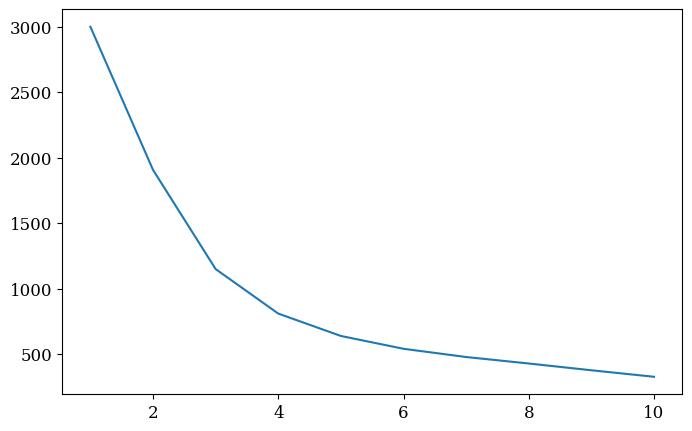

In [59]:
inert = []
k_range = list(range(1, 11))
for k in k_range:
    clu_kmeans = Pipeline(steps=[("preprocessor", preprocessor), ("clustering",KMeans(n_clusters=k))])
    clu_kmeans.fit(data)
    inert.append(clu_kmeans['clustering'].inertia_)
    
fig, ax = plt.subplots()   
ax.plot(k_range, inert)
fig.set_size_inches(5*1.6, 5)

El "codo" está en $K = 4$.

In [60]:
#Definimos el Pipeline de clustering con K = 2
clu_kmeans = Pipeline(steps=[("preprocessor", preprocessor), ("clustering",KMeans(n_clusters=4))])
clu_kmeans.fit(data)
print(f'con K = 4: la inercia es {clu_kmeans["clustering"].inertia_}')

con K = 4: la inercia es 808.8696622019536


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


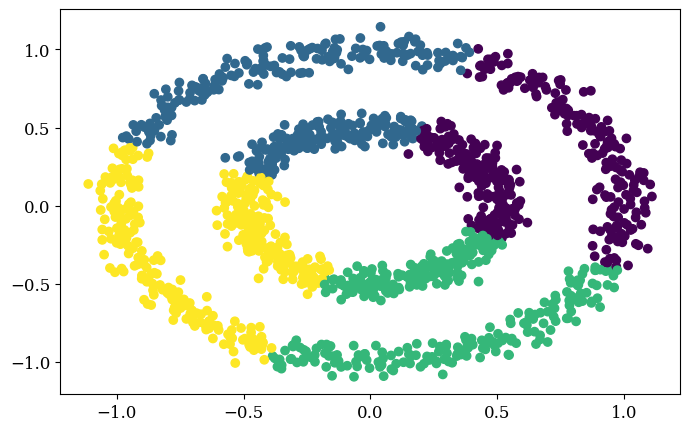

In [61]:
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], c=clu_kmeans["clustering"].labels_)
fig.set_size_inches(5*1.6, 5)

In [67]:
#Definimos el Pipeline de clustering con K = 2
#clu_dbscan = Pipeline(steps=[("preprocessor", preprocessor), ("clustering",DBSCAN(eps=0.1, min_samples=10))])
clu_dbscan = Pipeline(steps=[("clustering",DBSCAN(eps=0.1, min_samples=10))])
clu_dbscan.fit(data)

Pipeline(steps=[('clustering', DBSCAN(eps=0.1, min_samples=10))])

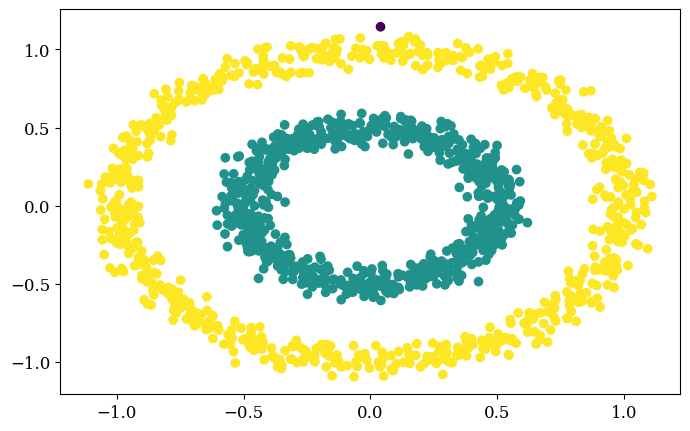

In [68]:
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], c=clu_dbscan["clustering"].labels_)
fig.set_size_inches(5*1.6, 5)

In [69]:
np.unique(clu_dbscan["clustering"].labels_, return_counts=True)

(array([-1,  0,  1]), array([  1, 750, 749]))